In [44]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import lyricsgenius
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import texthero as hero
from cleantext import clean
import scrubadub
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [23]:
#importing clean data from previous notebook
df = pd.read_csv("clean_data.csv")

In [24]:
#lets look at the dataframe
df

,Unnamed: 0,Artist,title,lyrics,Positive,Negative,Year
0,0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,2017.0
1,1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,2017.0
2,2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,2014.0
3,3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,2012.0
4,4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,2017.0
...,...,...,...,...,...,...,...
240,243,Lecrae,no regrets bryson price dubstep remix,reach records is the movement i want to take t...,0.195,0.025,2012.0
241,245,Lecrae,gates of hell won’t prevail,next i am not what ill become yeah keep the tr...,0.070,0.107,2021.0
242,248,Lecrae,welcome to america eng,ladies and gentlemen good afternoon from the f...,0.126,0.083,2021.0
243,249,Lecrae,apb bryson price remix,tenfour charlie i think we got a problem that ...,0.114,0.078,2013.0


In [25]:
df = df.drop(['Unnamed: 0'], axis=1)

In [26]:
df

,Artist,title,lyrics,Positive,Negative,Year
0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,2017.0
1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,2017.0
2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,2014.0
3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,2012.0
4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,2017.0
...,...,...,...,...,...,...
240,Lecrae,no regrets bryson price dubstep remix,reach records is the movement i want to take t...,0.195,0.025,2012.0
241,Lecrae,gates of hell won’t prevail,next i am not what ill become yeah keep the tr...,0.070,0.107,2021.0
242,Lecrae,welcome to america eng,ladies and gentlemen good afternoon from the f...,0.126,0.083,2021.0
243,Lecrae,apb bryson price remix,tenfour charlie i think we got a problem that ...,0.114,0.078,2013.0


In [30]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.replace('.0', ' ')

<ipython-input-30-f3267863782f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'] = df['Year'].str.replace('.0', ' ')


In [31]:
df

,Artist,title,lyrics,Positive,Negative,Year
0,Lecrae,ill find you,just fight a little longer my friend its all w...,0.144,0.091,17
1,Lecrae,blessings,ear drummers ooh yeah ooh yeah if i ever took ...,0.210,0.046,17
2,Lecrae,all i need is you,all i need is you all i need is you keep me in...,0.092,0.059,14
3,Lecrae,church clothes,yeah uh one time for htown one time for dtown ...,0.178,0.088,12
4,Lecrae,cry for you,this thorn in my flesh is the only thing i got...,0.166,0.218,17
...,...,...,...,...,...,...
240,Lecrae,no regrets bryson price dubstep remix,reach records is the movement i want to take t...,0.195,0.025,12
241,Lecrae,gates of hell won’t prevail,next i am not what ill become yeah keep the tr...,0.070,0.107,21
242,Lecrae,welcome to america eng,ladies and gentlemen good afternoon from the f...,0.126,0.083,21
243,Lecrae,apb bryson price remix,tenfour charlie i think we got a problem that ...,0.114,0.078,13


In [49]:
df.lyrics[1]

'ear drummers ooh yeah ooh yeah if i ever took a loss i learned a lesson i wont ever think im better than the next man ive been down before the come up i aint stressin baby im too busy countin all these blessings yah yah yah count it up count it up count it up count it up line em up line em up line em up line em up swear the sun shinin on me in my huddle no matter the trouble surroundin us they dont see that its a lot of us yeah everybody move anonymous woo wont take that credit i know where we get it them blessings be comin from god above blessings i was doin all kinda bad where the choir at tell em i need a verse verse hit the pew and tell god hes first first hit the studio to body a verse verse i remember pushin mamas little white hyundai with no gas money yeah i just bought a car cash money zoom i aint even tryna brag on it nah i just tell it how it really is i aint trippin they aint feelin this i aint sayin i deserve nothin im just tryna talk about the benefits ive been punchin in

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words ='english',max_features =2000)
vectors = vectorizer.fit_transform(df.lyrics)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,able,accept,acceptance,account,act,actin,acting,actions,actually,adam,...,youd,youll,young,younger,youre,youth,youve,zero,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.031598,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.03431,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.290216,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.117490,0.0,0.0,0.0,0.0,0.0


In [54]:
#train test split
X = words_df
y = df.lyrics

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
!pip install pystemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import Stemmer
# English stemmer from pyStemmer
stemmer = Stemmer.Stemmer('en')
analyzer = TfidfVectorizer().build_analyzer()
# Override TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: stemmer.stemWords(analyzer(doc))
# Create a new StemmedTfidfVectorizer
vectorizer = StemmedTfidfVectorizer(max_features=2000)
vectors = vectorizer.fit_transform(df.lyrics)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

You should consider upgrading via the '/Users/hannahkaplan/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


,abl,about,abov,abus,accept,acclaim,account,act,actin,action,...,youll,young,younger,your,yourself,youth,youv,zero,zombi,zone
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.023558,0.0,0.0,0.010091,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.006821,0.014245,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.004656,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.024010,0.0,0.0,0.0,0.0,0.017337,0.0,0.0,...,0.000000,0.0,0.0,0.102011,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.039001,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.066548,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.svm import LinearSVC

In [67]:
%%time
clf = LinearSVC()
clf.fit(X_train, y_train)

CPU times: user 218 ms, sys: 10.3 ms, total: 228 ms
Wall time: 235 ms


LinearSVC()

In [69]:
#evaluating classifier
clf.score(X_test, y_test)

0.0

In [70]:
import eli5
eli5.show_weights(clf, top=(10, 10), feature_names=vectorizer.get_feature_names())

y=a yo man let that beat drop on em yea oh you know im liking that right there wats good yall its yo boy lecrae some call me creezy im here with my clique representatives we just want to put it down for the lord jesus christ city to city and state to state we keep running into more clique members people who are unashamed of the gospel of jesus christ let me tell you where were from dog… new jerusalem thats my home let me put it in a song so youll never get it wrong no shame in the message thats the reason i live reason i live christ up in every song hes the reason im here all they rhyme about is guns money sex and drugs eighty percent of these dudes is fictional thugs we dont kill nobody we dont rob no stores we dont trap we aint strapped we dont smoke that dro we aint pimpin we aint trippin if we tippin on some fours then youll probably hear dat jesus muzik comin out our doors comin out our doors we aint ashamed you can call us lame but everybody gotta die and stand in front of the king we unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed we unashamed unashamed unashamed unashamed unashamed we unashamed watch this so you can really know what time it is god is resurrected and im here to glorify him kid ma jesus jesus ma jesus might make a great tune but we gotta lead em dip sets to the weight room i gotta date soon but it aint soon enough father keep pruning us cause its proven we known for screwing up i cant front cause the pressure is still thick and when sin look like the pressure im havin to turn quick a sin sick so merk it like john owen you know when jesus the christ you can pay him but still owe him we shoulda died and been buried for our wrong actions instead christ died and carried them on his own back what this is a known fact but some say that its fiction this is our lifestyle no its not a religion see i survived death back in and religion is not at all what got your boy through yea your boy crayola i dont do payola no flows full of baking soda just jehovah i get played to the left more than i get paid to write so i aint worried about eating dog tryin to display the christ we unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed we unashamed unashamed unashamed unashamed unashamed we unashamed you see me on the block the we look the same but we different we bring god to this thang while being vocal by the lord and not a piece or a chain but dont get it twisted its reasons these boys unashamed how bout lashes of beatings they laughing and teasing these blasphemous heathens reject the passion of jesus he fasted from speaking even with nails bashed in his feat and the cross he gasping and wheezing his lungs collapse as hes breathing the chief priest stone in the court of this chief my prince of peace minus the pipe who bought my grief so no more chiefin but like the rims that hit the curb curb we call em shoulder blades we got our crosses on our back like our shoulder blades this is death and resurrection that turned about my direction stepping toward perfection had nothing to do with me do with me but the gospel is the power and power bend men to bow out we poundin the pavement takin the message to the streets we unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed unashamed we unashamed unashamed unashamed unashamed unashamed top features,y=all i need is you all i need is you keep me in my timezone when my minds gone when im flying home and im stressed out and im tempted to get that styrofoam and go pour it up but you know whats up and you know that aint gone solve nothing i mean lord forbid i might fall or something and im all or nothing cause all i need is you to hold me down like bed straps to the psych ward its killing me but you still with me when i fight hard and all i need is you you digging me when im igging you get with me when my cards pulled coul

Taking a look at the album Restoration from 2020.

In [115]:
df2 = pd.read_csv("restoration2020.csv")

In [125]:
df2

,Artist,Title,Lyrics,Positive,Negative,Year
0,Lecrae,restore me,restore me restore me i lost everything i had ...,0.128,0.268,2020
1,Lecrae,set me free,take the shackles off my feet so i can dance i...,0.223,0.049,2020
2,Lecrae,wheels up,and for one second all my problems fade to gra...,0.151,0.079,2020
3,Lecrae,over the top,you a fool for this one over the top uh top ai...,0.242,0.031,2020
4,Lecrae,self discovery,he was a smart kid it was always about lecrae ...,0.111,0.104,2020
5,Lecrae,deep end,writenow ive been tryin not to go off the deep...,0.118,0.105,2020
6,Lecrae,drown,tell me that youll never let me down down down...,0.137,0.120,2020
7,Lecrae,sunday morning,i been messed up yeah stressed out with no luc...,0.283,0.076,2020
8,Lecrae,saturday night,is this real this is all unknown makes me feel...,0.197,0.071,2020
9,Lecrae,zombie,say blessed say blessed say blessed yeah i was...,0.225,0.083,2020


In [132]:
df2.describe()

,Positive,Negative,Year
count,14.000000,14.000000,14.0
mean,0.170857,0.096929,2020.0
std,0.061212,0.054763,0.0
min,0.070000,0.031000,2020.0
25%,0.129500,0.076750,2020.0
50%,0.149500,0.083500,2020.0
75%,0.224500,0.104750,2020.0
max,0.283000,0.268000,2020.0


In [119]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df2.Lyrics)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df2.index
data_dtm

,abandoned,abused,accused,achilles,act,actin,acting,actions,addiction,admire,...,yeah,yeahyeahyeah,yeahyeahyeahyeahyeahyeahyeahyeah,years,youll,young,youre,zombie,zone,zulu
0,1,1,1,0,0,0,0,0,0,0,...,3,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,3,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,5,0,7,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,29,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,3,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,3,0,0,0,...,7,0,0,0,0,1,0,29,0,0


In [187]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [188]:
stop_words.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til'])

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df= 0.1)
vectors = vectorizer.fit_transform(df2['Lyrics'])
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,actin,aint,already,always,another,answer,arms,around,away,baby,...,way,wear,well,without,woah,wont,workin,world,would,wow
0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.089267,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.035896,0.357068,0.044634,0.0,0.0,0.000000
2,0.000000,0.027289,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.039314,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.058217
3,0.000000,0.119094,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.019064,0.0,0.0,0.000000,0.090816,0.084691,0.000000,0.0,0.0,0.000000
4,0.080546,0.127300,0.000000,0.14561,0.0,0.0,0.0,0.0,0.0,0.080546,...,0.000000,0.0,0.0,0.090526,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [190]:
from sklearn.decomposition import NMF

In [191]:
nmf = NMF(n_components = 6)

In [192]:
#create topic variable
topic_values = nmf.fit_transform(vectors)

/Users/hannahkaplan/.pyenv/versions/3.8.10/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [193]:
#what are the different words in inidvidual topics
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num +1)
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: blessed heart nothing always checks get new couldnt man pull
Topic #2: wake real time want get day thought thank feel unknown
Topic #3: feet soul pray god free straight hold wont far believe
Topic #4: real wanna woah though dont aint none left baby right
Topic #5: keep end deep tryna aint might runnin give fraud got
Topic #6: drown lost takes inside turn away grow pain feel faith


In [194]:
topic_labels =['heart','time','beliefs','pursuit','resilience','religon']

In [195]:
df_topics = pd.DataFrame(topic_values, columns= topic_labels)

In [198]:
df2 = df2.join(df_topics)
df2.head()

In [197]:
df2

,Artist,Title,Lyrics,Positive,Negative,Year,heart,time,beliefs,pursuit,resilience,religion
0,Lecrae,restore me,restore me restore me i lost everything i had ...,0.128,0.268,2020,0.009918,0.009716,0.013638,0.000000,0.000000,0.829902
1,Lecrae,set me free,take the shackles off my feet so i can dance i...,0.223,0.049,2020,0.000000,0.000000,1.000000,0.078609,0.000000,0.000000
2,Lecrae,wheels up,and for one second all my problems fade to gra...,0.151,0.079,2020,0.000000,0.015344,1.000000,0.000000,0.000000,0.025465
3,Lecrae,over the top,you a fool for this one over the top uh top ai...,0.242,0.031,2020,0.000000,0.074222,0.000000,1.000000,0.000000,0.000000
4,Lecrae,self discovery,he was a smart kid it was always about lecrae ...,0.111,0.104,2020,1.000000,0.015528,0.000000,1.000000,0.000000,0.000000
5,Lecrae,deep end,writenow ive been tryin not to go off the deep...,0.118,0.105,2020,0.000000,0.000000,0.000000,0.000000,1.000000,0.007678
6,Lecrae,drown,tell me that youll never let me down down down...,0.137,0.120,2020,0.000000,0.000000,0.000000,0.082698,0.040991,0.722766
7,Lecrae,sunday morning,i been messed up yeah stressed out with no luc...,0.283,0.076,2020,0.014854,1.000000,0.028233,0.000000,0.057424,0.000000
8,Lecrae,saturday night,is this real this is all unknown makes me feel...,0.197,0.071,2020,0.000000,1.000000,0.000000,1.000000,0.000000,0.006110
9,Lecrae,zombie,say blessed say blessed say blessed yeah i was...,0.225,0.083,2020,1.000000,0.000000,0.000000,0.000000,0.000000,0.000089


In [202]:
#df2.loc[df2['heart'] >= 0.1, "heart"] = 1
#df2.loc[df2['time'] >= 0.1, "time"] = 1
#df2.loc[df2['beliefs'] >= 0.1, "beliefs"] = 1
#df2.loc[df2['pursuit'] >= 0.1, "pursuit"] = 1
#df2.loc[df2['resilience'] >= 0.1, "resilience"] = 1
#df2.loc[df2['religon'] >= 0.1, "religon"] = 1

In [201]:
#df2.loc[df2['heart'] <0.1, "heart"] = 0
#df2.loc[df2['time'] < 0.1, "time"] = 0
#df2.loc[df2['beliefs'] < 0.1, "beliefs"] = 0
#df2.loc[df2['pursuit'] < 0.1, "pursuit"] = 0
#df2.loc[df2['resilience'] < 0.1, "resilience"] = 0
#df2.loc[df2['religon'] < 0.1, "religon"] = 0

In [200]:
df2

,Artist,Title,Lyrics,Positive,Negative,Year,heart,time,beliefs,pursuit,resilience,religion
0,Lecrae,restore me,restore me restore me i lost everything i had ...,0.128,0.268,2020,0.0,0.0,0.0,0.0,0.0,0.829902
1,Lecrae,set me free,take the shackles off my feet so i can dance i...,0.223,0.049,2020,0.0,0.0,1.0,0.0,0.0,0.000000
2,Lecrae,wheels up,and for one second all my problems fade to gra...,0.151,0.079,2020,0.0,0.0,1.0,0.0,0.0,0.025465
3,Lecrae,over the top,you a fool for this one over the top uh top ai...,0.242,0.031,2020,0.0,0.0,0.0,1.0,0.0,0.000000
4,Lecrae,self discovery,he was a smart kid it was always about lecrae ...,0.111,0.104,2020,1.0,0.0,0.0,1.0,0.0,0.000000
5,Lecrae,deep end,writenow ive been tryin not to go off the deep...,0.118,0.105,2020,0.0,0.0,0.0,0.0,1.0,0.007678
6,Lecrae,drown,tell me that youll never let me down down down...,0.137,0.120,2020,0.0,0.0,0.0,0.0,0.0,0.722766
7,Lecrae,sunday morning,i been messed up yeah stressed out with no luc...,0.283,0.076,2020,0.0,1.0,0.0,0.0,0.0,0.000000
8,Lecrae,saturday night,is this real this is all unknown makes me feel...,0.197,0.071,2020,0.0,1.0,0.0,1.0,0.0,0.006110
9,Lecrae,zombie,say blessed say blessed say blessed yeah i was...,0.225,0.083,2020,1.0,0.0,0.0,0.0,0.0,0.000089


In [226]:
df3 = pd.read_csv('RestorationLyrics.csv')

In [227]:
df3

,Restoration Lyrics
0,restore me restore me lost everything i had i...


In [242]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause'])

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df= 0.1)
vectors = vectorizer.fit_transform(df3['Restoration Lyrics'])
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,abandoned,abused,accused,achilles,act,actin,acting,actions,addiction,admire,...,world,worry,worth,wow,wrestle,wrestlin,wrong,young,zombie,zone
0,0.005782,0.005782,0.005782,0.005782,0.011564,0.017347,0.017347,0.005782,0.005782,0.005782,...,0.023129,0.005782,0.011564,0.017347,0.005782,0.011564,0.017347,0.005782,0.167683,0.005782


In [263]:
words_df.value_counts()

abandoned  abused    accused   achilles  act       actin     acting    actions   addiction  admire    admit     adolf     ago       ahead     ahmaud    aint      alive     almost    alone     already   alright   always   anger     another   answer    antisemitic  anybody   app       applause  area      arena     arms      around    arrest    arrested  ashes     ask       atoms     attic     aunt      awakened  awards    away      awol      aye       ayy       babe      babies    baby      babysitter  bacon     bad       bah       bail      ball      barbies   barely    bars      battles   beach     beast     beat      beauty    bed       beggar    bein      believe   belize    belly     belong    benz      best      better    big       bill      billboard  birthday  bitterness  black     blazin    blessed   blessings  blew      blinded   blockin   blood     bloods    blow      blown     bluff     bottle    bottom    bought    bound     bout      boy       brain     branch    brazy     

In [247]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [274]:
text = open('RestorationLyrics.csv').read()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.extend(['hm','oh','yeah','let','ive','go','im','yall','thats','woo','still','gotta','goin','cause','youre','come','know',
                  'woo','back','made','every','uh','hmm','em','like','til','yah','yeahyeahyeah','yeahyeahyeahyeahyeahyeahyeahyea',
                  'youll','yet','years','xhosa','ya', 'yeahyeahyeahyeahyeahyeahyeahyeah','zulu','would','woulda', 'like','see','saw',
                  'just','oh','writenow','put','til','cant','cause','get','got'])

In [275]:
wc =WordCloud (
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width =400

)

In [276]:
wc.generate(text)

In [277]:
wc.to_file("wordcloud_restoration.png")

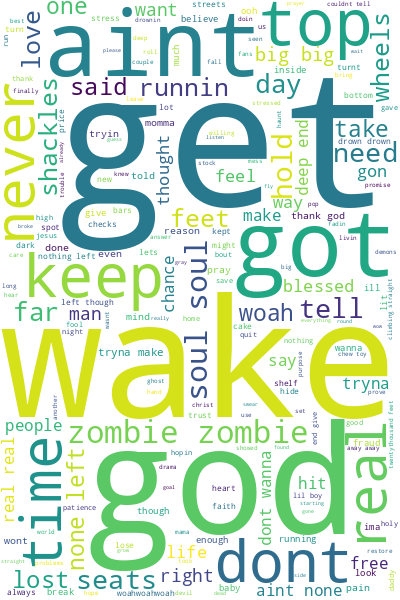
